In [85]:
# Importing all necessary libraries
%load_ext autoreload
%autoreload 2

# internal packages
import os
from collections import Counter, OrderedDict

# external packages
import torch
import torchvision
import numpy as np
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score
from sklearn.decomposition import PCA
import matplotlib
from matplotlib import pyplot as plt

# util functions
from main.util import *

# dataset functions
from dataset import load_util

# autoencoder
from models.autoencoder.conv_ae import ConvAE
from models.simclr.simclr import *
from models.simclr.transforms import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
print("Versions:")
print(f"torch: {torch.__version__}")
print(f"torchvision: {torchvision.__version__}")
print(f"numpy: {np.__version__}",)
print(f"scikit-learn: {sklearn.__version__}")

device = detect_device()
print("Using device: ", device)

Versions:
torch: 1.7.1+cu110
torchvision: 0.8.2+cu110
numpy: 1.19.5
scikit-learn: 0.24.1
Using device:  cuda


In [47]:
# specify learning params
batch_size = 64
learning_rate = 1e-3
epochs = 150

# training

train = True

# load datasets and create dataloaders
data, testdata = load_util.load_cifar('./data', download=True, for_model='SimCLR')
data_percent = 0.4

Files already downloaded and verified


### SimCLR Transforms example

In [125]:
t = SimCLRTransforms(to_tensor=False)

In [126]:
t_pic = []
for i in range(10):
    pic = torch.from_numpy(np.transpose(data.data[i], (2,0,1)))
    t_pic += [pic] + list(t(pic))

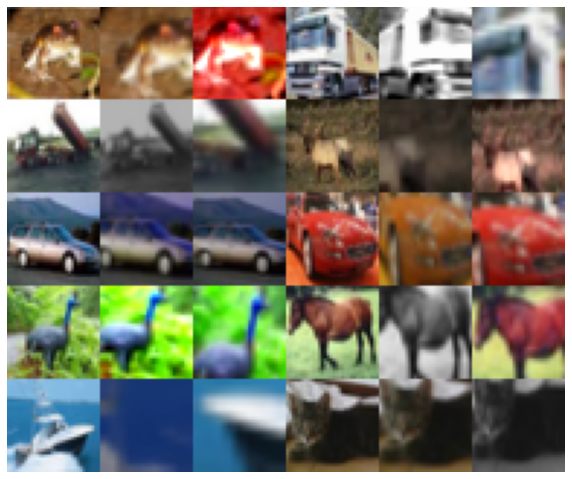

In [127]:
plot_images(t_pic, nrow=6)